In [49]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict 

In [50]:
paths = ["trades_round_1_day_-2_wn.csv", "trades_round_1_day_-1_wn.csv", "trades_round_1_day_0_wn.csv", "trades_round_3_day_0_wn.csv", "trades_round_3_day_1_wn.csv", "trades_round_4_day_1_wn.csv", "trades_round_3_day_2_wn.csv", "trades_round_4_day_2_wn.csv", "trades_round_4_day_3_wn.csv"]
days = [0, 1, 2, 2, 3, 3, 4, 4, 5]

df = pd.DataFrame()
for i, path in enumerate(paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * days[i]
    df = pd.concat([df, new_df])

df = df.drop(df[df['buyer'] == df['seller']].index)
df.head(8)
# df['seller'].unique()

end_price = {
    'AMETHYSTS': 9995.0,
    'STARFRUIT': 5048.0,
    'ORCHIDS': 1148.6,
    'CHOCOLATE': 7752.0	,
    'STRAWBERRIES': 3985.0,
    'ROSES': 14392.0,
    'GIFT_BASKET': 69550.0, 
    'COCONUT': 9860.5,
    'COCONUT_COUPON': 582,
}

# df[(df['symbol'] != 'COCONUT') & (df['symbol'] != 'COCONUT_COUPON')& (df['symbol'] != 'GIFT_BASKET')& (df['symbol'] != 'CHOCOLATE')& (df['symbol'] != 'ROSES')& (df['symbol'] != 'STRAWBERRIES')].tail(20)

In [51]:
bidask_paths = ['prices_round_1_day_-2.csv', 'prices_round_2_day_-1.csv', 'prices_round_3_day_0.csv', 'prices_round_4_day_1.csv', 'prices_round_4_day_2.csv', 'prices_round_4_day_3.csv']

bidask_df = pd.DataFrame()
for i, path in enumerate(bidask_paths):
    new_df = pd.read_csv(path, delimiter=";")
    # add 1000000 to timestamp column
    new_df["timestamp"] = new_df["timestamp"] + 1000000 * i
    bidask_df = pd.concat([bidask_df, new_df])

bidask_df.tail(50)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_volume_3,mid_price,profit_and_loss,ORCHIDS,TRANSPORT_FEES,EXPORT_TARIFF,IMPORT_TARIFF,SUNLIGHT,HUMIDITY,DAY
19950,3.0,5997500,COCONUT_COUPON,583.0,44.0,NaN,NaN,NaN,NaN,584.0,...,NaN,583.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19951,3.0,5997500,COCONUT,9882.0,119.0,9881.0,76.0,NaN,NaN,9883.0,...,NaN,9882.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19952,3.0,5997600,COCONUT,9882.0,102.0,9881.0,47.0,NaN,NaN,9883.0,...,NaN,9882.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19953,3.0,5997600,COCONUT_COUPON,582.0,37.0,NaN,NaN,NaN,NaN,583.0,...,NaN,582.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19954,3.0,5997700,COCONUT,9883.0,111.0,9882.0,52.0,NaN,NaN,9884.0,...,NaN,9883.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19955,3.0,5997700,COCONUT_COUPON,582.0,40.0,NaN,NaN,NaN,NaN,583.0,...,NaN,582.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19956,3.0,5997800,COCONUT,9883.0,118.0,9882.0,66.0,NaN,NaN,9884.0,...,NaN,9883.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19957,3.0,5997800,COCONUT_COUPON,583.0,44.0,NaN,NaN,NaN,NaN,584.0,...,NaN,583.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19958,3.0,5997900,COCONUT_COUPON,583.0,35.0,NaN,NaN,NaN,NaN,584.0,...,NaN,583.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19959,3.0,5997900,COCONUT,9882.0,139.0,9881.0,48.0,NaN,NaN,9883.0,...,NaN,9882.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
class BotPosition:
    def __init__(self):
        self.seashells = 0
        self.position = 0

class BotProfits:
    def __init__(self):
        self.positions = dict()
        self.products = ['AMETHYSTS', 'STARFRUIT', 'ORCHIDS', 'CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET', 'COCONUT', 'COCONUT_COUPON']
        self.bot_names = ['Ruby', 'Valentina', 'Remy', 'Vinnie', 'Vladimir', 'Rhianna', 'Amelia', 'Adam', 'Raj']

        for product in self.products:
            for name in self.bot_names:
                self.positions[f'{product} - {name}'] = BotPosition()

In [53]:
bot_profits = BotProfits()

for _, row in df.iterrows():
    buyer, seller, product, price, quantity = row['buyer'], row['seller'], row['symbol'], row['price'], row['quantity']

    bot_profits.positions[f'{product} - {seller}'].seashells += price * quantity
    bot_profits.positions[f'{product} - {seller}'].position -= quantity
    bot_profits.positions[f'{product} - {buyer}'].seashells -= price * quantity
    bot_profits.positions[f'{product} - {buyer}'].position += quantity

for id in bot_profits.positions.keys():
    product = id.split()[0]
    print(f'{id}, {bot_profits.positions[id].seashells + bot_profits.positions[id].position * end_price[product]}')

AMETHYSTS - Ruby, -8294.0
AMETHYSTS - Valentina, 23569.0
AMETHYSTS - Remy, -10623.0
AMETHYSTS - Vinnie, 7239.0
AMETHYSTS - Vladimir, 4701.0
AMETHYSTS - Rhianna, -5949.0
AMETHYSTS - Amelia, -9343.0
AMETHYSTS - Adam, -1300.0
AMETHYSTS - Raj, 0.0
STARFRUIT - Ruby, -17129.0
STARFRUIT - Valentina, 51131.0
STARFRUIT - Remy, -18590.0
STARFRUIT - Vinnie, -1581.0
STARFRUIT - Vladimir, 3764.0
STARFRUIT - Rhianna, -3062.0
STARFRUIT - Amelia, -12471.0
STARFRUIT - Adam, -2062.0
STARFRUIT - Raj, 0.0
ORCHIDS - Ruby, 0.0
ORCHIDS - Valentina, 0.0
ORCHIDS - Remy, 0.0
ORCHIDS - Vinnie, 0.0
ORCHIDS - Vladimir, 0.0
ORCHIDS - Rhianna, 0.0
ORCHIDS - Amelia, 0.0
ORCHIDS - Adam, 0.0
ORCHIDS - Raj, 0.0
CHOCOLATE - Ruby, 0.0
CHOCOLATE - Valentina, 0.0
CHOCOLATE - Remy, 55029.0
CHOCOLATE - Vinnie, -487785.0
CHOCOLATE - Vladimir, 432756.0
CHOCOLATE - Rhianna, 0.0
CHOCOLATE - Amelia, 0.0
CHOCOLATE - Adam, 0.0
CHOCOLATE - Raj, 0.0
STRAWBERRIES - Ruby, 0.0
STRAWBERRIES - Valentina, 0.0
STRAWBERRIES - Remy, -12912.0
S

In [54]:
# plot vinnie trades for coupon

vinnie_sells = df[df['seller'] == 'Vinnie']['timestamp']
vinnie_buys = df[df['buyer'] == 'Vinnie']['timestamp']
vinnie_buys

28         4500
37         7300
53        10200
133       27700
226       44800
         ...   
1565    5914600
1613    5948700
1620    5955500
1680    5992000
1694    5998600
Name: timestamp, Length: 5900, dtype: int64

<Figure size 2000x1000 with 0 Axes>

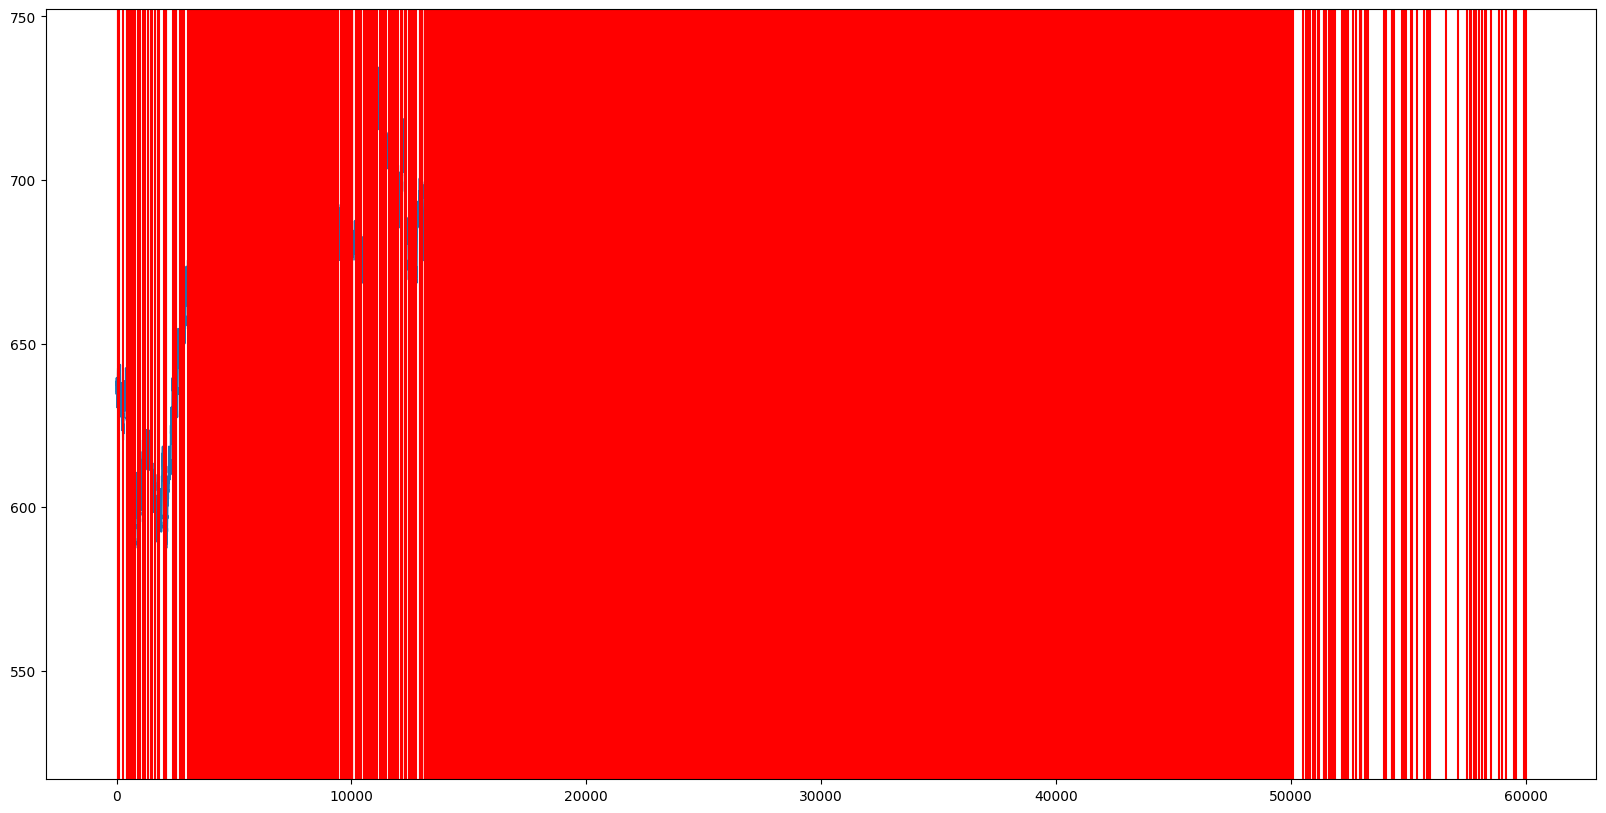

In [55]:
coupon = np.array(bidask_df[bidask_df["product"] == "COCONUT_COUPON"]['mid_price'].to_list())
times = [i for i in range(len(coupon))]

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(times, coupon, label='coupon')
# plt.legend()


[ax.axvline(x=element//100, color='red') for element in vinnie_buys]
plt.show()
